In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [ ]:
# Cargar los datos desde el archivo CSV
file_path = "../data/raw/Tablas_Unidas.csv"
df = pd.read_csv(file_path, sep=',')

# Convertir la columna ID_Date a formato de fecha (YYYY-MM-DD)
df['ID_Date'] = pd.to_datetime(df['ID_Date'], format='%Y%m').dt.strftime('%Y-%m-%d')

# Columnas a limpiar (ejemplo)
columnas_numericas = ['CINE', 'EXTERIOR', 'INTERNET', 'PRENSA', 'RADIO', 'REVISTAS', 
                      'PlataformasVideo', 'VARIOS', 'Sales', 'Ticket_medio', 'INV_Total', "PRODUCCION"]

for col in columnas_numericas:
    if df[col].dtype == object:  # Si es texto (por las comas)
        df[col] = df[col].str.replace(',', '.').astype(float)  # Convertir a float


# Mostrar el DataFrame
df.head()

,ID_Date,Unique_visitors,PDFBrochuresDownloaded,ProductConfigurator,Product_configurator_Visists,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,...,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,REVISTAS,PlataformasVideo,VARIOS,INV_Total,ClickCollect
0,2022-01-01,272382,4838,33222,94248,1415,65373,25,167199,63649,...,8200.00,133666.43,0.0,6050.0,2426.40,18013.50,338824.94,7531.03,574600.14,137015
1,2022-02-01,352581,5823,38570,109531,546,77209,26,176733,124861,...,94627.51,189275.94,10000.0,6700.0,0.00,49110.91,487537.14,6972.02,916515.08,201984
2,2022-03-01,332955,4845,33956,97805,5444,83178,341,173514,104132,...,0.00,214037.62,4500.0,3700.0,0.00,0.00,75000.00,15284.85,367522.47,148413
3,2022-04-01,282169,3711,45949,90689,1184,69335,162,162805,74044,...,0.00,194816.97,48800.0,21550.0,1140.00,40876.00,610865.89,12255.75,941187.91,141937
4,2022-05-01,261829,9037,48685,92069,8648,70972,210,156011,44196,...,0.00,130795.16,11000.0,4900.0,102851.86,20775.75,393807.74,7926.46,746390.17,98521


In [12]:
# Lista de columnas relevantes
cols_to_keep = [
    "ID_Date", "Unique_visitors", "Visit_Store", "Sales"
]

# Agregar columnas relacionadas con inversión
inversion_cols = [col for col in df.columns if any(x in col.lower() for x in ["cine", "internet", "radio", "revistas", "exterior", "prensa", "produccion", "plataformasvideo", "varios", "inv_total"])]

# Agregar columnas relacionadas con fechas
fecha_cols = [col for col in df.columns if any(x in col.lower() for x in ["dia", "date", "mes", "working_days", "easter", "semana"])]

# Filtrado total
filtered_df = df[cols_to_keep + inversion_cols + fecha_cols]


filtered_df.head()

,ID_Date,Unique_visitors,Visit_Store,Sales,CINE,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,...,VARIOS,INV_Total,ID_Date,OnlineMedia,Dias_mes,Dia_inicio_mes,Dia_findemes,working_days,Dias_fines_semana,Easterweek
0,2022-01-01,272382,5516,1299,59887.84,8200.00,133666.43,0.0,6050.0,2426.40,...,7531.03,574600.14,2022-01-01,63649,31,5,7,21,10,0
1,2022-02-01,352581,6769,1752,72291.56,94627.51,189275.94,10000.0,6700.0,0.00,...,6972.02,916515.08,2022-02-01,124861,28,1,7,20,8,0
2,2022-03-01,332955,6249,1897,55000.00,0.00,214037.62,4500.0,3700.0,0.00,...,15284.85,367522.47,2022-03-01,104132,31,1,3,23,8,0
3,2022-04-01,282169,6507,1546,10883.30,0.00,194816.97,48800.0,21550.0,1140.00,...,12255.75,941187.91,2022-04-01,74044,30,4,5,22,8,1
4,2022-05-01,261829,7183,1784,74333.20,0.00,130795.16,11000.0,4900.0,102851.86,...,7926.46,746390.17,2022-05-01,44196,31,6,1,21,10,0


C:\Users\josit\AppData\Local\Temp\ipykernel_19908\2186284899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['INV_Total'] = filtered_df['INV_Total'].round().astype(int)  # Redondear a enteros


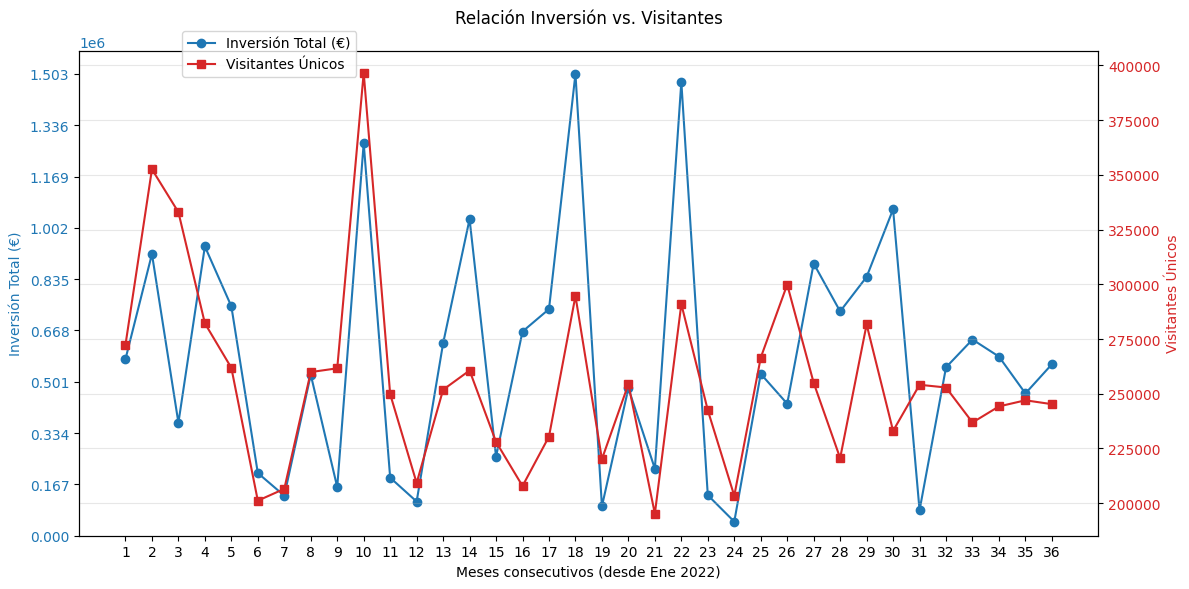

In [13]:
# Preparación de datos
filtered_df['INV_Total'] = filtered_df['INV_Total'].round().astype(int)  # Redondear a enteros
meses = range(1, len(filtered_df) + 1)  # Índice numérico 1, 2, 3...

# Configuración del gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# --- Eje Izquierdo (Inversión Total) ---
ax1.plot(meses, filtered_df['INV_Total'], 
         color='tab:blue', marker='o', label='Inversión Total (€)')

# Configuración del eje Y izquierdo
max_inversion = filtered_df['INV_Total'].max()
ax1.set_ylim(0, max_inversion * 1.05)  # 5% más arriba del máximo
ax1.set_yticks(np.linspace(0, max_inversion, 10))  # 10 divisiones equidistantes
ax1.set_ylabel('Inversión Total (€)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# --- Eje Derecho (Visitantes Únicos) ---
ax2 = ax1.twinx()
ax2.plot(meses, filtered_df['Unique_visitors'], 
         color='tab:red', marker='s', label='Visitantes Únicos')
ax2.set_ylabel('Visitantes Únicos', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# --- Ajustes finales ---
ax1.set_xticks(meses)
ax1.set_xticklabels([f'{i}' for i in meses])
ax1.set_xlabel('Meses consecutivos (desde Ene 2022)')

plt.title('Relación Inversión vs. Visitantes', pad=20)
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.95))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

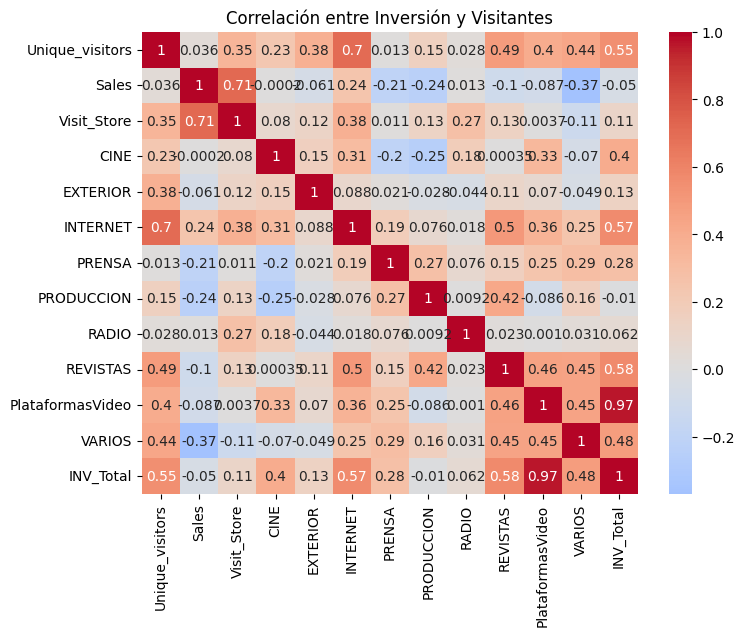

In [15]:
# Calcular matriz de correlación
corr = filtered_df[['Unique_visitors',"Sales", 'Visit_Store', "CINE","EXTERIOR","INTERNET","PRENSA","PRODUCCION","RADIO","REVISTAS","PlataformasVideo","VARIOS","INV_Total"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Inversión y Visitantes')
plt.show()

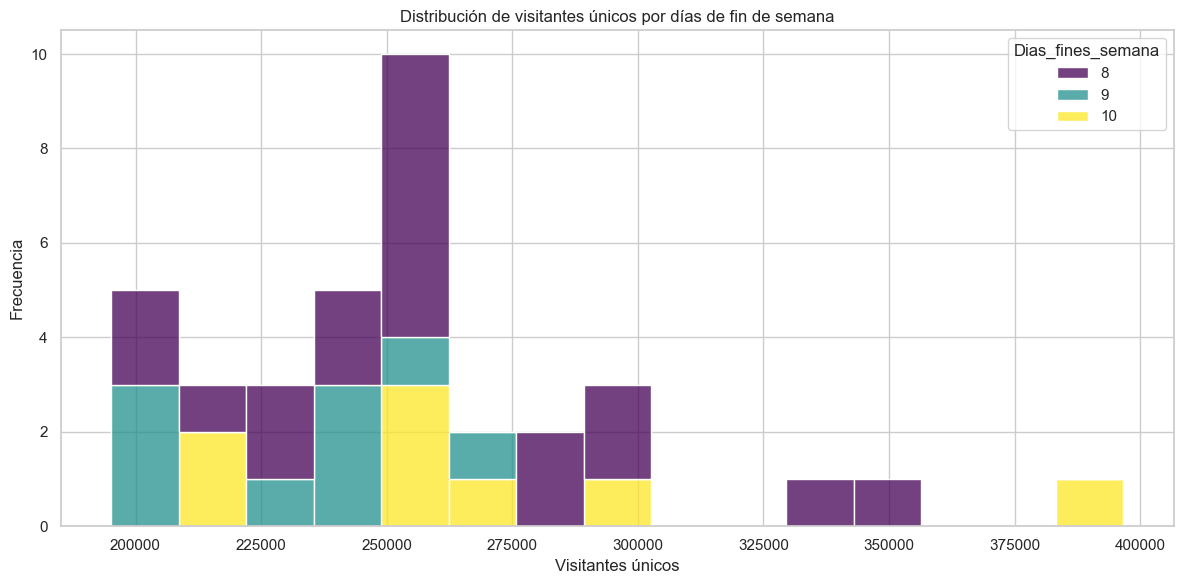

In [14]:
# Estilo
sns.set(style="whitegrid")

# Histograma agrupado por cantidad de días de fin de semana
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Unique_visitors', hue='Dias_fines_semana', bins=15, palette='viridis', multiple='stack')
plt.title('Distribución de visitantes únicos por días de fin de semana')
plt.xlabel('Visitantes únicos')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


C:\Users\josit\AppData\Local\Temp\ipykernel_22852\3927406491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='working_days', y='Unique_visitors', palette='Blues')


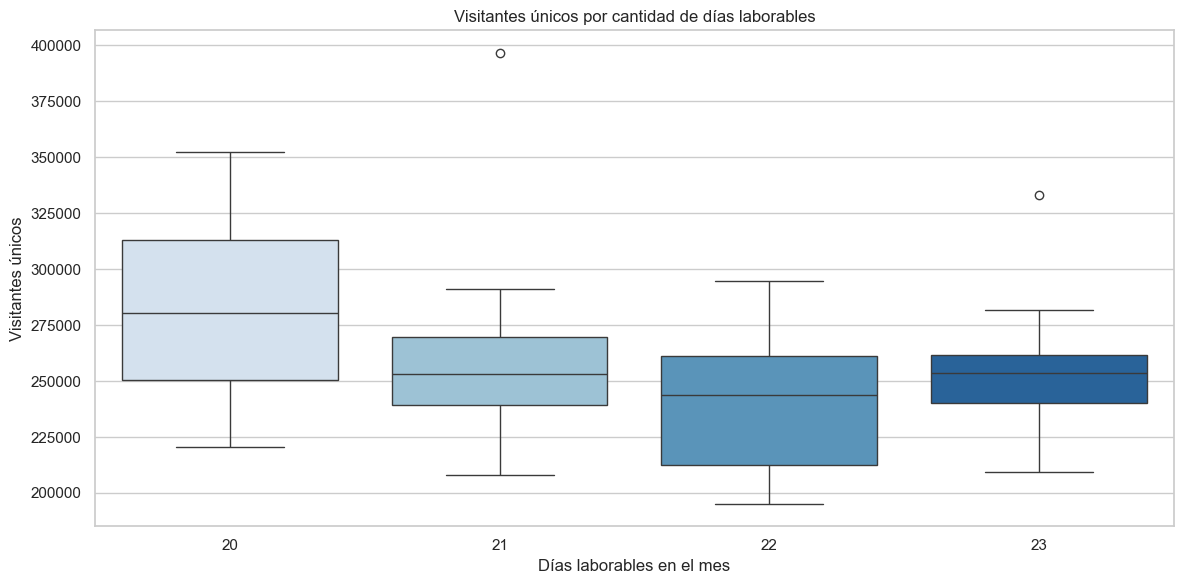

In [15]:
# Estilo
sns.set(style="whitegrid")

# Gráfico boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='working_days', y='Unique_visitors', palette='Blues')
plt.title('Visitantes únicos por cantidad de días laborables')
plt.xlabel('Días laborables en el mes')
plt.ylabel('Visitantes únicos')
plt.tight_layout()
plt.show()


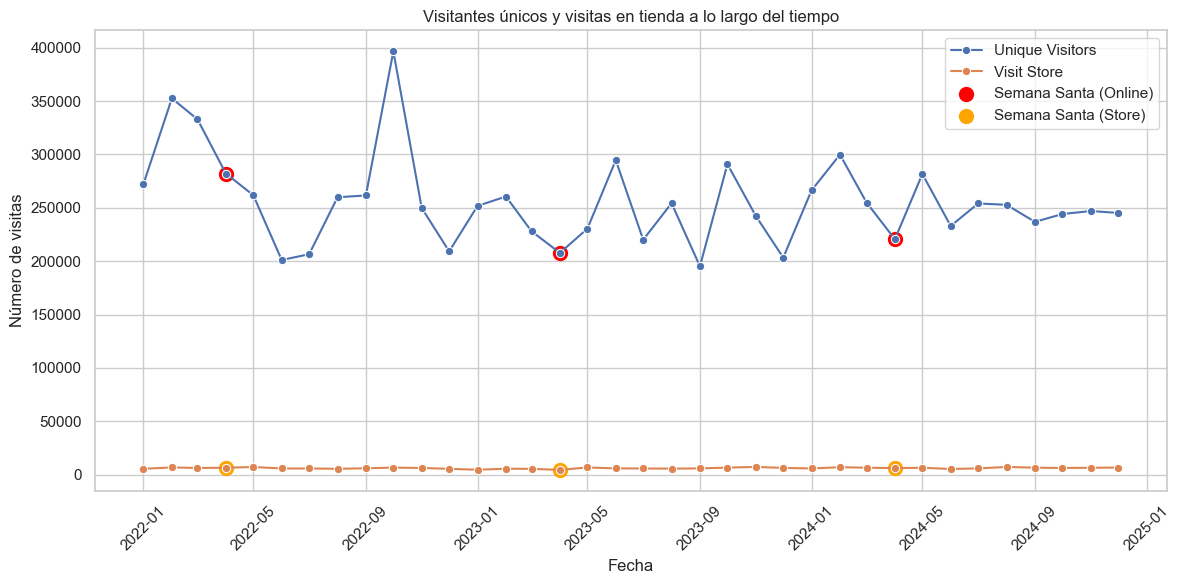

In [17]:
# Gráfico 2: Línea temporal con indicador de Semana Santa
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='ID_Date', y='Unique_visitors', marker='o', label='Unique Visitors')
sns.lineplot(data=df, x='ID_Date', y='Visit_Store', marker='o', label='Visit Store')

# Colorear los puntos si es Semana Santa
easter_df = df[df['Easterweek'] == 1]
plt.scatter(easter_df['ID_Date'], easter_df['Unique_visitors'], color='red', s=100, label='Semana Santa (Online)')
plt.scatter(easter_df['ID_Date'], easter_df['Visit_Store'], color='orange', s=100, label='Semana Santa (Store)')

plt.title('Visitantes únicos y visitas en tienda a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de visitas')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


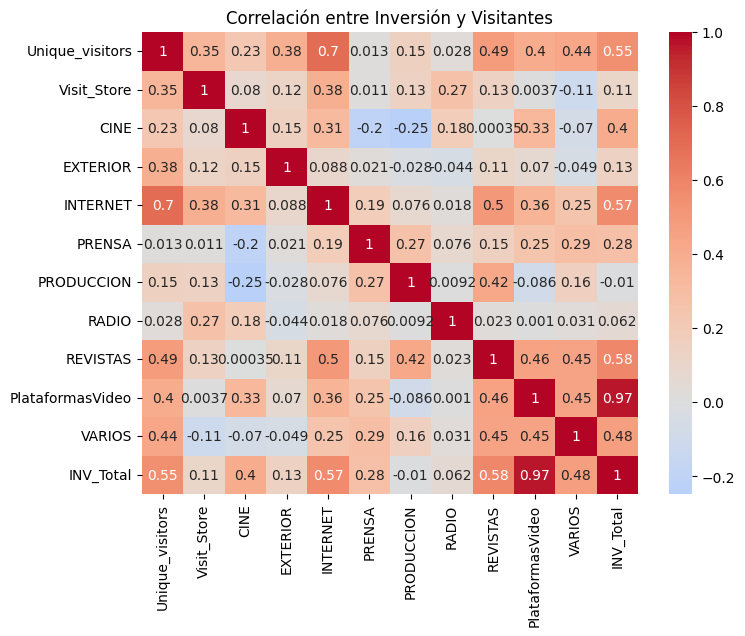

In [70]:
# Crear copia base
df_1 = df.drop(columns=['ID_Date']).copy()

# --------- FILTRO PARA UNIQUE_VISITORS ---------
corr_unique = df_1.corr(numeric_only=True)['Unique_visitors']
cols_to_drop_unique = corr_unique[(corr_unique > -0.25) & (corr_unique < 0.25)].index.tolist()

df_unique = df_1.drop(columns=cols_to_drop_unique)

print(f"[Unique_visitors] Columnas eliminadas por baja correlación: {len(cols_to_drop_unique)}")
print("Columnas eliminadas:", cols_to_drop_unique)

# --------- FILTRO PARA VISIT_STORE ---------
corr_store = df_1.corr(numeric_only=True)['Visit_Store']
cols_to_drop_store = corr_store[(corr_store > -0.15) & (corr_store < 0.15)].index.tolist()

df_store = df_1.drop(columns=cols_to_drop_store)

print(f"\n[Visit_Store] Columnas eliminadas por baja correlación: {len(cols_to_drop_store)}")
print("Columnas eliminadas:", cols_to_drop_store)


[Unique_visitors] Columnas eliminadas por baja correlación: 24
Columnas eliminadas: ['PDFBrochuresDownloaded', 'SocialNetworks', 'DirectTraffic', 'EMail', 'PaidSearch', 'Otros', 'Mercado', 'Sales', 'Complementos.1', 'Ropa_hombre', 'Zapatos.1', 'Ropa_Mujer', 'Interior.1', 'Ticket_medio', 'Dias_mes', 'Dia_inicio_mes', 'Dia_findemes', 'working_days', 'Dias_fines_semana', 'Easterweek', 'CINE', 'PRENSA', 'PRODUCCION', 'RADIO']

[Visit_Store] Columnas eliminadas por baja correlación: 26
Columnas eliminadas: ['PDFBrochuresDownloaded', 'SocialNetworks', 'EMail', 'NaturalSearch', 'PaidSearch', 'Complementos', 'Zapatos', 'Home', 'Interior', 'SR_Total', 'Mercado', 'Interior.1', 'Otros.1', 'Dias_mes', 'Dia_inicio_mes', 'Dia_findemes', 'working_days', 'Dias_fines_semana', 'CINE', 'EXTERIOR', 'PRENSA', 'PRODUCCION', 'REVISTAS', 'PlataformasVideo', 'VARIOS', 'INV_Total']


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd

# Selección de variables predictoras según la matriz de correlación
# predictors_online = ['INTERNET', 'REVISTAS', 'VARIOS', 'PlataformasVideo', 'INV_Total']
predictors_online = df_unique.drop(columns=['Unique_visitors', 'Visit_Store']).columns.tolist()
predictors_offline = df_store.drop(columns=['Unique_visitors', 'Visit_Store']).columns.tolist()
# Variables objetivo
y_online = df['Unique_visitors']
y_offline = df['Visit_Store']

# Preparar conjuntos X para cada modelo
X_online = df[predictors_online]
X_offline = df[predictors_offline]

# Dividir en entrenamiento y prueba
X_train_online, X_test_online, y_train_online, y_test_online = train_test_split(X_online, y_online, test_size=0.2, random_state=42)
X_train_offline, X_test_offline, y_train_offline, y_test_offline = train_test_split(X_offline, y_offline, test_size=0.2, random_state=42)

# Modelos de regresión lineal
model_online = LinearRegression().fit(X_train_online, y_train_online)
model_offline = LinearRegression().fit(X_train_offline, y_train_offline)

# Predicciones
y_pred_online = model_online.predict(X_test_online)
y_pred_offline = model_offline.predict(X_test_offline)

# Métricas
mse_online = mean_squared_error(y_test_online, y_pred_online)
r2_online = r2_score(y_test_online, y_pred_online)

mse_offline = mean_squared_error(y_test_offline, y_pred_offline)
r2_offline = r2_score(y_test_offline, y_pred_offline)

print(f"📊 Online - MSE: {mse_online:.2f}, R²: {r2_online:.2f}")
print(f"🏬 Offline - MSE: {mse_offline:.2f}, R²: {r2_offline:.2f}")

# Coeficientes
coef_online_df = pd.DataFrame({'Canal': predictors_online, 'Impacto en Visitas Online': model_online.coef_})
coef_offline_df = pd.DataFrame({'Canal': predictors_offline, 'Impacto en Visitas Offline': model_offline.coef_})

print("\nCoeficientes Online:")
print(coef_online_df)

print("\nCoeficientes Offline:")
print(coef_offline_df)


📊 Online - MSE: 186115457.00, R²: 0.27
🏬 Offline - MSE: 174856.77, R²: 0.71

Coeficientes Online:
                           Canal  Impacto en Visitas Online
0         PDFBrochuresDownloaded                   2.152875
1            ProductConfigurator                  -0.636877
2   Product_configurator_Visists                   0.154102
3                 SocialNetworks                   0.014204
4                  DirectTraffic                   0.399772
5                          EMail                  -0.573366
6                  NaturalSearch                   0.718083
7                    OnlineMedia                   0.532794
8                  OtherReferrer                   0.457564
9                     PaidSearch                   0.558489
10                    RopaHombre                  -0.155399
11                     RopaMujer                  -0.185406
12                  Complementos                  -1.318112
13                       Zapatos                   0.355275
14

In [8]:
print("Impacto en Visitas Offline:")
coef_offline_df

Impacto en Visitas Offline:


,Canal,Impacto en Visitas Offline
0,CINE,-0.006381
1,EXTERIOR,0.006102
2,INTERNET,0.004226
3,PRENSA,-0.007905
4,RADIO,0.013498
5,REVISTAS,0.000099
6,PlataformasVideo,-0.000172
7,VARIOS,-0.021936


In [9]:
print("Impacto en Visitas Online:")
coef_online_df

Impacto en Visitas Online:


,Canal,Impacto en Visitas Online
0,CINE,-0.084504
1,EXTERIOR,0.890931
2,INTERNET,0.370363
3,PRENSA,-1.045242
4,RADIO,0.113022
5,REVISTAS,0.073219
6,PlataformasVideo,0.016311
7,VARIOS,2.979942


In [10]:
import matplotlib.pyplot as plt

resultados.plot.barh(x='Canal', y='Impacto_en_Ventas', 
                    title='Impacto de cada canal en ventas (Regresión Lineal)')
plt.xlabel('Incremento en visitas por € invertido')
plt.show()

NameError: name 'resultados' is not defined